# Introduction

This is a personal Data Analysis project on car sales using a dataset available on [Kaggle](https://github.com/loggi/loggibud/blob/master/docs/quickstart.md). The dataset contains car sales data from 2022 and 2023 with the following information:  

- **Car_id:** Unique identifier for each car in the dataset  
- **Date:** Purchase date  
- **Customer Name:** Buyer's name  
- **Gender:** Buyer's gender  
- **Annual Income:** Buyer's annual income  
- **Dealer_Name:** Name of the dealership associated with the purchase  
- **Company:** Car brand  
- **Model:** Car model  
- **Engine:** Car engine specifications  
- **Transmission:** Type of transmission  
- **Color:** Car color  
- **Price:** Sale price  
- **Dealer_No:** Number associated with the dealership - not specified  
- **Body Style:** Car body style  
- **Phone:** Buyer's phone number  
- **Region:** Sales region  

## **Project Goals:**  
- Evaluate sales trends and seasonality over these years  
- Analyze sales performance by dealership and region  
- Understand consumer preferences in purchases  
- Obtain a forecast for 2024 sales  


#  Importing Libraries

In [1]:
import datetime as dt
import warnings

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

warnings.simplefilter('ignore')

# Data Collection and Processing

In [15]:
# Reading the Data
car_sales_data = pd.read_csv('/content/Car Sales.xlsx - car_data.csv')

# First rows of the DataFrame:
print('First rows of the DataFrame:')
car_sales_data.head()


First rows of the DataFrame:


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [16]:
#Renaming columns
new_columns = {'Car_id' : 'CAR_ID',
                'Date' : 'DATE',
                'Customer Name': 'CUSTOMER_NAME',
                'Gender' : 'GENDER',
                'Annual Income': 'ANNUAL_INCOME',
                'Dealer_Name' : 'DEALER_NAME',
                'Company' : 'COMPANY',
                'Model': 'MODEL',
                'Engine': 'ENGINE',
                'Transmission': 'TRANSMISSION',
                'Color': 'COLOR',
                'Price ($)': 'PRICE',
                'Dealer_No ': 'DEALER_NO',
                'Body Style': 'BODY_STYLE',
                'Phone': 'PHONE',
                'Dealer_Region' : 'DEALER_REGION'}
car_sales_data = car_sales_data.rename(columns=new_columns)

In [17]:
# DataFrame Info:
print(" DataFrame Info: \n")
car_sales_data.info()

 DataFrame Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CAR_ID         23906 non-null  object
 1   DATE           23906 non-null  object
 2   CUSTOMER_NAME  23905 non-null  object
 3   GENDER         23906 non-null  object
 4   ANNUAL_INCOME  23906 non-null  int64 
 5   DEALER_NAME    23906 non-null  object
 6   COMPANY        23906 non-null  object
 7   MODEL          23906 non-null  object
 8   ENGINE         23906 non-null  object
 9   TRANSMISSION   23906 non-null  object
 10  COLOR          23906 non-null  object
 11  PRICE          23906 non-null  int64 
 12  DEALER_NO      23906 non-null  object
 13  BODY_STYLE     23906 non-null  object
 14  PHONE          23906 non-null  int64 
 15  DEALER_REGION  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


Thus, we can see that there are no null or missing values in the DataFrame. The presence of null data can directly impact data analysis and modeling, as some operations may not be performed correctly with missing values.


In [18]:
# Transforming data types
car_sales_data['DATE'] = pd.to_datetime(car_sales_data['DATE'])
car_sales_data['PHONE'] = car_sales_data['PHONE'].astype(str)


In [19]:
# Descriptive statistics for numerical columns
print('Descriptive statistics for numerical columns:')
car_sales_data.describe().round(2)


Descriptive statistics for numerical columns:


,DATE,ANNUAL_INCOME,PRICE
count,23906,23906.00,23906.00
mean,2023-03-01 14:28:10.822387456,830840.29,28090.25
min,2022-01-02 00:00:00,10080.00,1200.00
25%,2022-09-20 00:00:00,386000.00,18001.00
50%,2023-03-13 00:00:00,735000.00,23000.00
75%,2023-09-08 00:00:00,1175750.00,34000.00
max,2023-12-31 00:00:00,11200000.00,85800.00
std,NaN,720006.40,14788.69


## **Insights:**  
- The majority of cars are priced below **34K**, with the highest value reaching **85.8K**. This indicates that, although there are higher-priced cars, sales are concentrated on more affordable vehicles. It also suggests the possibility of outliers in the DataFrame.  

- The difference between the **third quartile** and the **maximum** in **'ANNUAL_INCOME'**, along with the **high standard deviation**, indicates the presence of outliers—meaning a small number of customers earn significantly more.  


In [20]:
# Descriptive statistics for categorical columns
print('Descriptive statistics for categorical columns:')
car_sales_data.drop(['DATE', 'ANNUAL_INCOME', 'PRICE'], axis=1).describe().round(2)


Descriptive statistics for categorical columns:


,CAR_ID,CUSTOMER_NAME,GENDER,DEALER_NAME,COMPANY,MODEL,ENGINE,TRANSMISSION,COLOR,DEALER_NO,BODY_STYLE,PHONE,DEALER_REGION
count,23906,23905,23906,23906,23906,23906,23906,23906,23906,23906,23906,23906,23906
unique,23906,3021,2,28,30,154,2,2,3,7,5,23804,7
top,C_CND_000001,Thomas,Male,Progressive Shippers Cooperative Association No,Chevrolet,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,85257-3102,SUV,6005535,Austin
freq,1,92,18798,1318,1819,418,12571,12571,11256,3814,6374,2,4135


In [21]:
# Analyzing the relationship between 'ENGINE' and 'TRANSMISSION'
print("All cars with MANUAL transmission have the engine: ", car_sales_data.query("TRANSMISSION == 'Manual'")['ENGINE'].unique())
print("All cars with AUTO transmission have the engine: ", car_sales_data.query("TRANSMISSION == 'Auto'")['ENGINE'].unique())


All cars with MANUAL transmission have the engine:  ['Overhead Camshaft']
All cars with AUTO transmission have the engine:  ['DoubleÂ\xa0Overhead Camshaft']


## **Insights:**  
* The variables **'CAR_ID', 'CUSTOMER_NAME', 'PHONE', and 'ENGINE'** are not relevant for analysis because:  
    - **'CAR_ID'** is a unique identification code for each car and does not present attributes that repeat or correlate with sales.  
    - **'CUSTOMER_NAME'** only shows the first name, which may identify different customers.  
    - **'PHONE'** is a unique characteristic for each customer. Since we have **23,906 total values**, **23,804 distinct values**, and the same number appears at most **twice**, we conclude that only **51 customers** possibly bought **two cars**—a sample too small to draw conclusions about customer recurrence.  
    - **'ENGINE'** can be discarded as it corresponds to the **'TRANSMISSION'** column.  

## **To Investigate:**  
* How is the sales performance by:  
    * **Dealership?**  
    * **Car brand and model?**  
    * **Sales by region?**  
* What is the relationship between car characteristics?  


In [22]:
# Dropping the columns 'CAR_ID', 'CUSTOMER_NAME', 'PHONE', and 'ENGINE'
car_sales_data = car_sales_data.drop(['CAR_ID', 'CUSTOMER_NAME', 'PHONE', 'ENGINE'], axis=1)


# Exploratory Data Analysis

## **Sales Performance Analysis**  


In [23]:
palette = sns.color_palette('colorblind' , 8)

### Desempenho das vendas ao longo do tempo

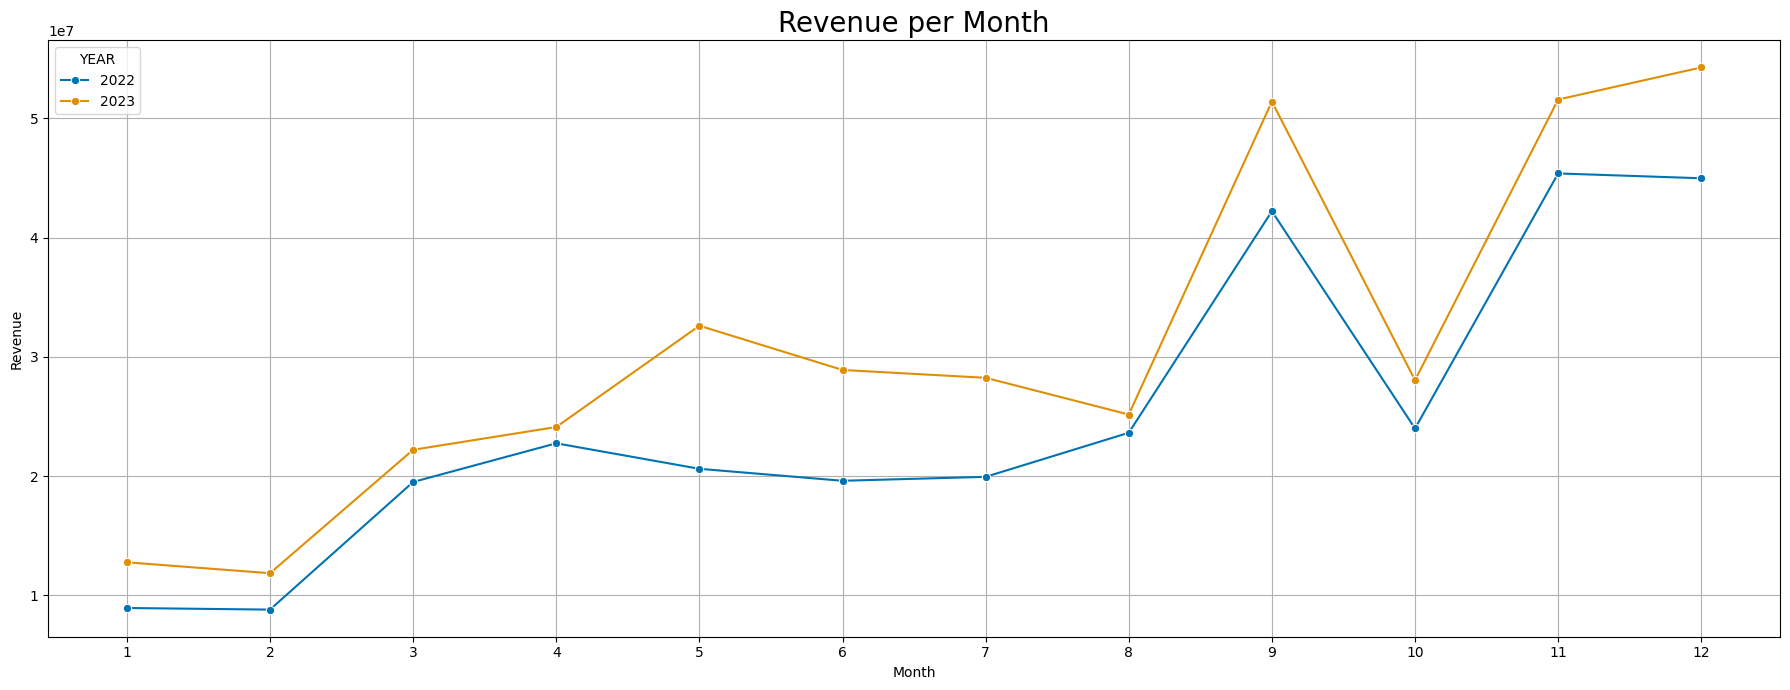

In [25]:
car_sales_data['MONTH'] = car_sales_data['DATE'].dt.month
car_sales_data['YEAR'] = car_sales_data['DATE'].dt.year
monthly_sales = car_sales_data.groupby(['MONTH', 'YEAR'])['PRICE'].sum().to_frame()

fig, ax = plt.subplots(figsize=(18,7))

sns.lineplot(data=monthly_sales, x='MONTH', y='PRICE', marker='o', hue='YEAR', errorbar=None, palette=palette)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue per Month', fontsize=20)
plt.xticks(range(1, 13))
plt.grid(True)

plt.tight_layout()
plt.show()


**Insight:** Based on the chart, we can conclude:  
* The year 2023 achieved better sales performance in every month compared to the previous year.  
* There is a well-defined pattern in sales throughout the year, with peaks in September, November, and December, and a drop in January and February. In the remaining months, total sales remain stable around 2 to 3 million dollars. It is important to highlight that from May to July 2023, there was a different behavior from the pattern observed in the previous year.  

**Investigate:**  
* What factors influence the drop in sales in October?  
* What factors contributed to the increase in sales from May to July in 2023?  
    - Was there any marketing action or promotional campaign during this period?  
    - Can this growth be observed across all dealerships?  


### Distribuição das vendas ( preço )

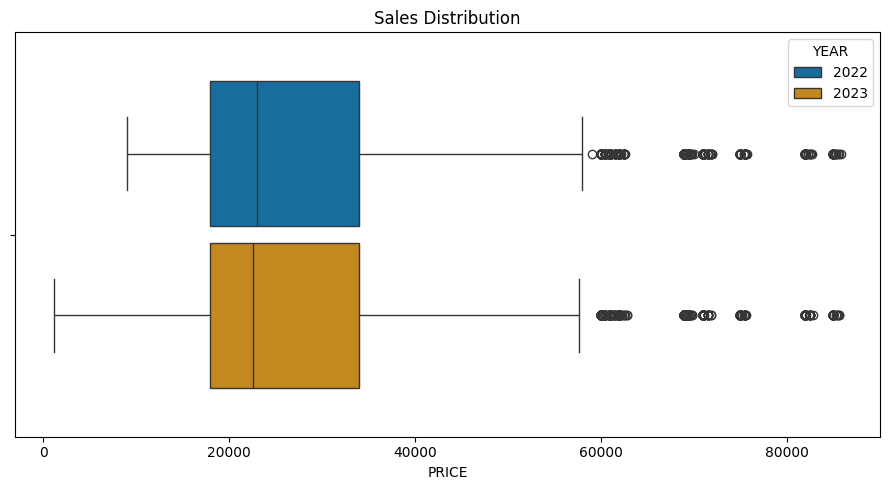

In [26]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(data=car_sales_data[['PRICE', 'YEAR']], x='PRICE', hue='YEAR', gap=.1, palette=palette)
plt.title('Sales Distribution')

plt.tight_layout()
plt.show()


**Insights:**  
* The graph shows that the sales distribution is similar, except for the sales of lower-priced cars in 2023.  

**Investigate:**  
* Could the increase in total sales in 2023 be explained by the sales of lower-priced cars?  


In [27]:
soma_low_2023 = car_sales_data.query('YEAR == 2023 & PRICE <= 9000')['PRICE'].sum()
difference_22_23 = car_sales_data.query('YEAR == 2023')['PRICE'].sum() - car_sales_data.query('YEAR == 2022')['PRICE'].sum()

print(f"The revenue difference between the two years was ${difference_22_23}")
print(f"The total sales of cars in 2023 priced below the minimum price of 2022 is ${soma_low_2023}, which represents {((soma_low_2023/difference_22_23)*100).round(1)}% of the total difference")


The revenue difference between the two years was $70844775
The total sales of cars in 2023 priced below the minimum price of 2022 is $807050, which represents 1.1% of the total difference


**Conclusion:** Since the sales of lower-priced cars represent a very small percentage of the revenue difference between the two years, this is not sufficient to explain the total increase in sales in 2023.


## Dealers Performance Analysis

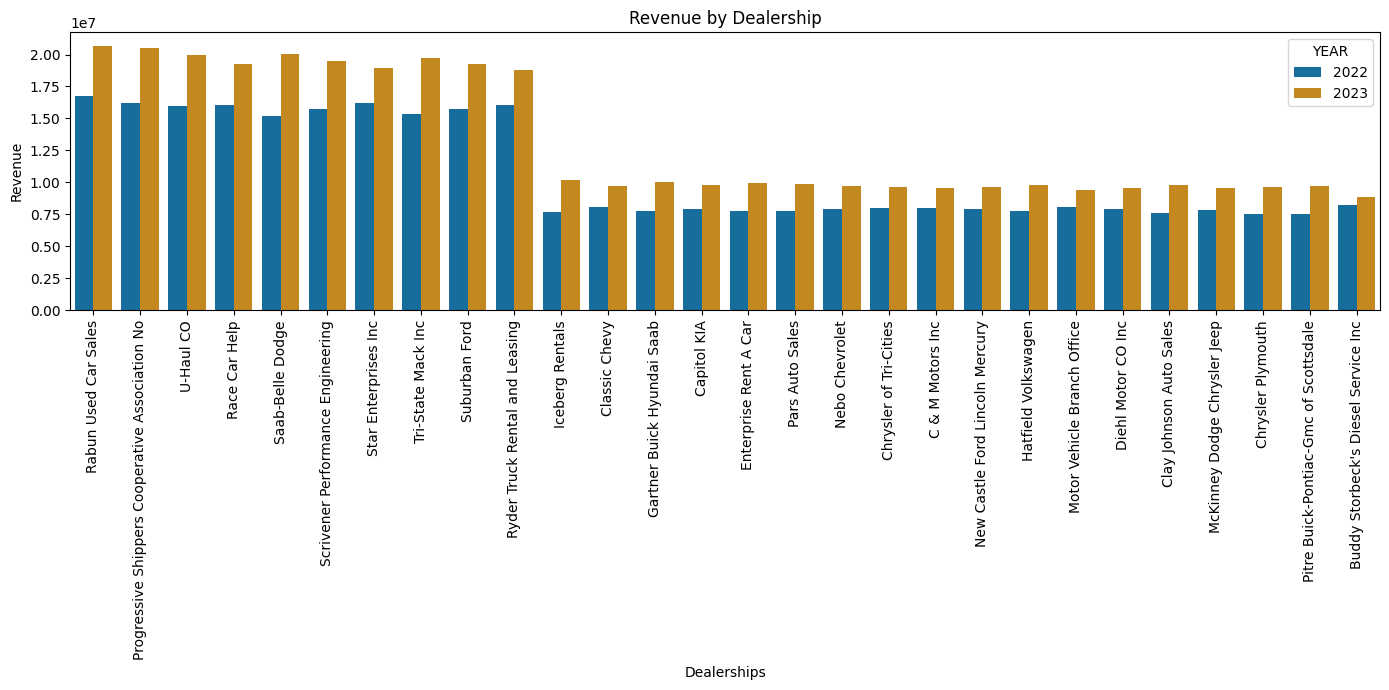

In [28]:
dealers_sales = car_sales_data.groupby(['DEALER_NAME'])['PRICE'].sum().to_frame()
sales_order = list(dealers_sales.sort_values(by=['PRICE'], ascending=False).index)
dealers_sales_by_year = car_sales_data.groupby(['DEALER_NAME', 'YEAR'])['PRICE'].sum().to_frame()

fig, ax = plt.subplots(figsize=(14,7))
sns.set_palette('colorblind')

sns.barplot(data=dealers_sales_by_year, x='DEALER_NAME', y='PRICE', hue='YEAR', order=sales_order, palette=palette)
plt.xlabel('Dealerships')
plt.ylabel('Revenue')
plt.title('Revenue by Dealership')
plt.xticks(rotation=90)
plt.tight_layout()


**Insights:**  
* Dealerships can be categorized into two well-defined groups based on their total revenue. One group consists of the top 10 highest-earning dealerships, while the other comprises the 18 dealerships with lower revenue.  

**Investigate:**  
* The division of these groups might be influenced by:  
  - The region where the dealership is located?  
  - The types of cars sold by each dealership?  


### Analysis of Dealerships by Group  

We define Group A as the 10 dealerships with the highest sales, while the remaining ones make up Group B.


In [29]:
groupA = car_sales_data.query("DEALER_NAME in ['Rabun Used Car Sales','Progressive Shippers Cooperative Association No','U-Haul CO','Race Car Help','Saab-Belle Dodge','Scrivener Performance Engineering','Star Enterprises Inc','Tri-State Mack Inc','Suburban Ford','Ryder Truck Rental and Leasing']")
groupB = car_sales_data.query("DEALER_NAME not in ['Rabun Used Car Sales','Progressive Shippers Cooperative Association No','U-Haul CO','Race Car Help','Saab-Belle Dodge','Scrivener Performance Engineering','Star Enterprises Inc','Tri-State Mack Inc','Suburban Ford','Ryder Truck Rental and Leasing']")

####  Distruição das Vendas e Rendas dos Clientes

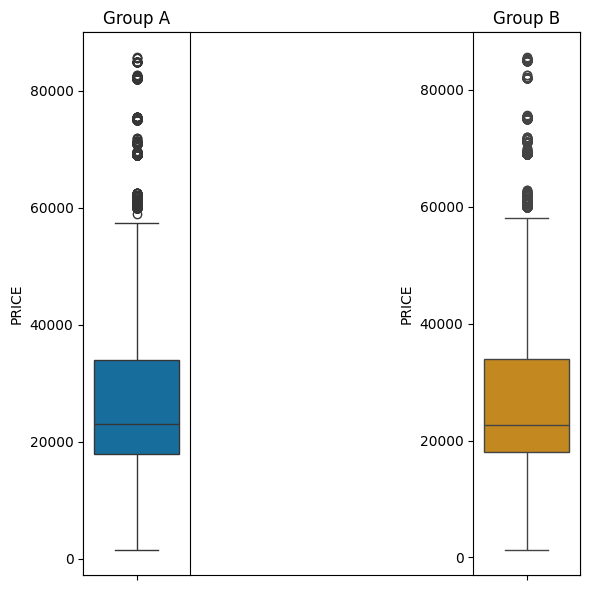

In [30]:
fig, ax = plt.subplots(figsize=(6,6))

plt.subplot(1,3,1)
sns.boxplot(groupA['PRICE'], color=palette[0])
plt.title('Group A')

plt.subplot(1,3,3)
sns.boxplot(groupB['PRICE'], color=palette[1])
plt.title('Group B')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()


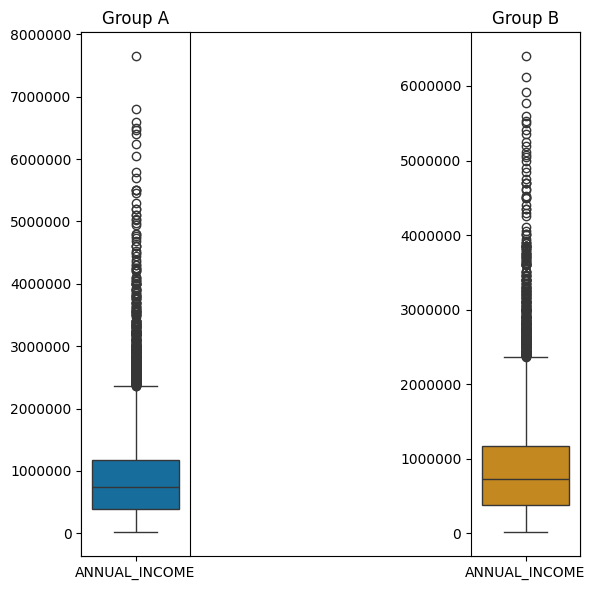

In [31]:
fig, ax = plt.subplots(figsize=(6,6))

plt.subplot(1,3,1)
maxim = groupA["ANNUAL_INCOME"].max()
sns.boxplot(groupA['ANNUAL_INCOME'].to_frame().query(f'ANNUAL_INCOME < {maxim}'), color=palette[0])
# The maximum value was removed to facilitate comparison between the two graphs; this does not affect data consistency.
plt.ticklabel_format(style='plain', axis='y')
plt.title('Group A')

plt.subplot(1,3,3)
maxim = groupB["ANNUAL_INCOME"].max()
sns.boxplot(groupB['ANNUAL_INCOME'].to_frame().query(f'ANNUAL_INCOME < {maxim}'), color=palette[1])
# The maximum value was removed to facilitate comparison between the two graphs; this does not affect data consistency.
plt.title('Group B')
plt.ticklabel_format(style='plain', axis='y')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()


The distribution of sales and customers' annual income is similar in both groups, meaning these factors are not decisive for the division between them.

Categorical Columns

In [32]:
groupA.drop(['DATE', 'ANNUAL_INCOME', 'PRICE', 'YEAR', 'MONTH', 'DEALER_NAME'], axis = 1).describe().round(2)

,GENDER,COMPANY,MODEL,TRANSMISSION,COLOR,DEALER_NO,BODY_STYLE,DEALER_REGION
count,12617,12617,12617,12617,12617,12617,12617,12617
unique,2,30,154,2,3,7,5,7
top,Male,Chevrolet,Prizm,Auto,Pale White,85257-3102,SUV,Austin
freq,9939,965,221,6635,5970,2562,3387,2606


In [33]:
groupB.drop(['DATE', 'ANNUAL_INCOME', 'PRICE', 'YEAR', 'MONTH', 'DEALER_NAME'], axis = 1).describe().round(2)


,GENDER,COMPANY,MODEL,TRANSMISSION,COLOR,DEALER_NO,BODY_STYLE,DEALER_REGION
count,11289,11289,11289,11289,11289,11289,11289,11289
unique,2,30,154,2,3,7,5,7
top,Male,Chevrolet,Diamante,Auto,Pale White,38701-8047,SUV,Pasco
freq,8859,854,218,5936,5286,1886,2987,1778


The distribution of these variables, except for the store's region, remains similar in both groups. This leads to the conclusion that, at first glance, none of these factors are decisive in differentiating the groups.

Regarding the region, there is a considerable difference in the most frequently occurring value, which may indicate a relationship with the group division.









#### Region

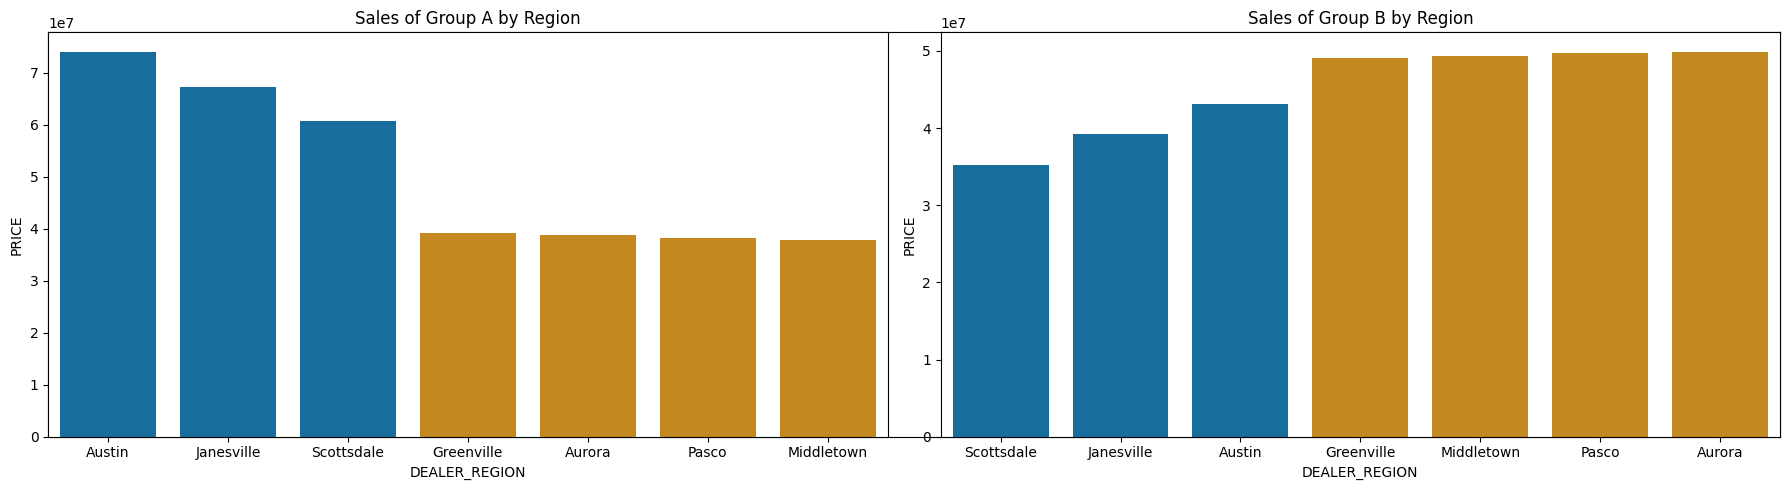

In [34]:
# Assign colors based on dealer regions
colors = [palette[0] if x in ['Scottsdale', 'Janesville', 'Austin'] else palette[1]
          for x in groupB.groupby('DEALER_REGION')['PRICE'].sum().sort_values().to_frame().index]

fig, ax = plt.subplots(figsize=(18,5))

# Plot for Group A
plt.subplot(1,2,1)
sns.barplot(data=groupA.groupby('DEALER_REGION')['PRICE'].sum().sort_values(ascending=False).to_frame(),
            x='DEALER_REGION', y='PRICE', palette=colors)
plt.title('Sales of Group A by Region')

# Plot for Group B
plt.subplot(1,2,2)
sns.barplot(data=groupB.groupby('DEALER_REGION')['PRICE'].sum().sort_values().to_frame(),
            x='DEALER_REGION', y='PRICE', palette=colors)
plt.title('Sales of Group B by Region')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()


**Insights:**
* There is a noticeable contrast in store performance by region, as the regions with the best performance in one group tend to have the worst performance in the other group and vice versa. This understanding can contribute to the creation of more efficient campaigns and strategies according to each objective, such as planning the implementation of a new store unit in a specific region.


## Sales Analysis by Region


### Sales Distribution

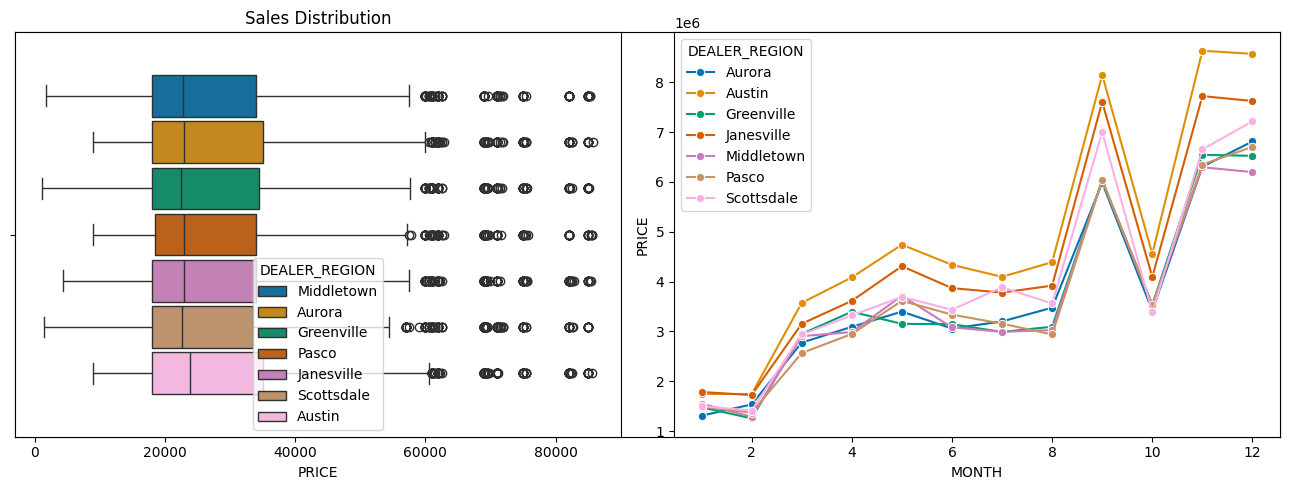

In [35]:
fig, ax = plt.subplots(figsize=(13, 5))

# Sales distribution by region
plt.subplot(1, 2, 1)
sns.boxplot(data=car_sales_data[['PRICE', 'DEALER_REGION']], x='PRICE', hue='DEALER_REGION', gap=.1)
plt.title('Sales Distribution')

# Monthly revenue by region
plt.subplot(1, 2, 2)
monthly_sales = car_sales_data.groupby(['MONTH', 'YEAR', 'DEALER_REGION'])['PRICE'].sum().to_frame()
sns.lineplot(data=monthly_sales, x='MONTH', y='PRICE', marker='o', hue='DEALER_REGION', errorbar=None)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()


With the graphs, it is possible to conclude that the regions have similar characteristics regarding sales distribution and patterns throughout the year.

Since we previously identified a relationship between regions and the division of dealerships into two groups, it may also be possible to categorize the regions.

Thus, based on dealership groups A and B, two region groups were created:  
- **Group 1:** Scottsdale, Janesville, and Austin.  
- **Group 2:** All other regions.


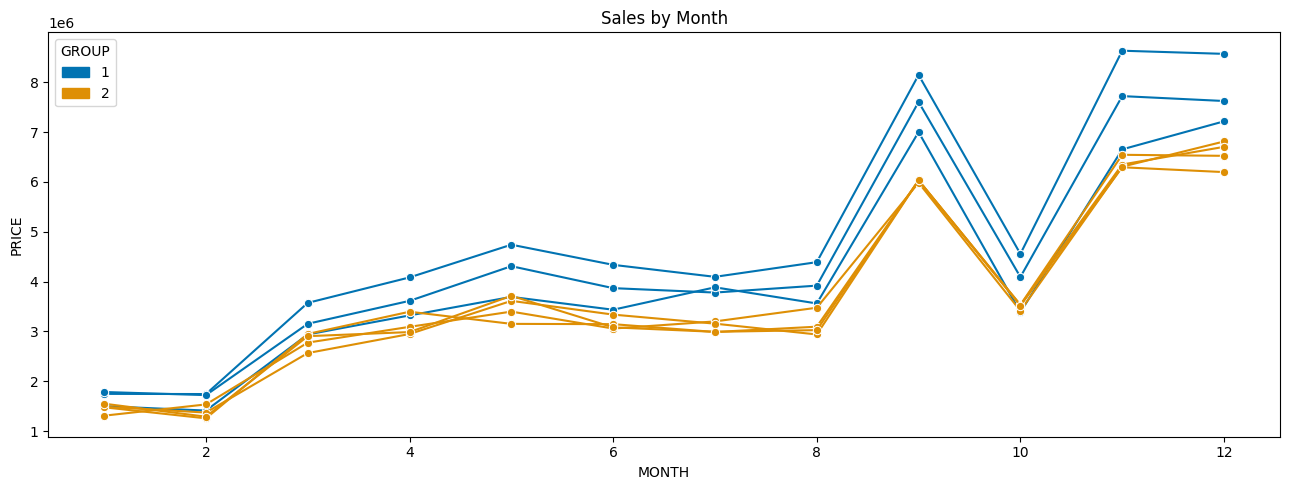

In [36]:
fig, ax  = plt.subplots(figsize= (13,5))


cores = [palette[0] if x in ['Scottsdale', 'Janesville', 'Austin'] else palette[1] for x in groupB.groupby('DEALER_REGION')['PRICE'].sum().sort_values().to_frame().index]
ordem = [ 'Austin' , 'Janesville' , 'Scottsdale' , 'Greenville' , 'Aurora' , 'Pasco' , 'Middletown']
A_patch = mpatches.Patch(color= palette[0], label='1')
B_patch = mpatches.Patch(color= palette[1] ,label='2')


monthly_sales = car_sales_data.groupby(['MONTH', 'YEAR','DEALER_REGION'])['PRICE'].sum().to_frame()
sns.lineplot( data = monthly_sales , x= 'MONTH', y = 'PRICE', marker='o', hue = 'DEALER_REGION', errorbar=None,  palette = cores , hue_order = ordem)
plt.title('Sales by Month')

plt.legend(handles=[A_patch, B_patch], title = 'GROUP')

plt.tight_layout()
plt.show()

As the graphs show, the categorization proves to be effective, given the pattern that regions within the same segment exhibit.


## Car features

### Company



#### Company - overview

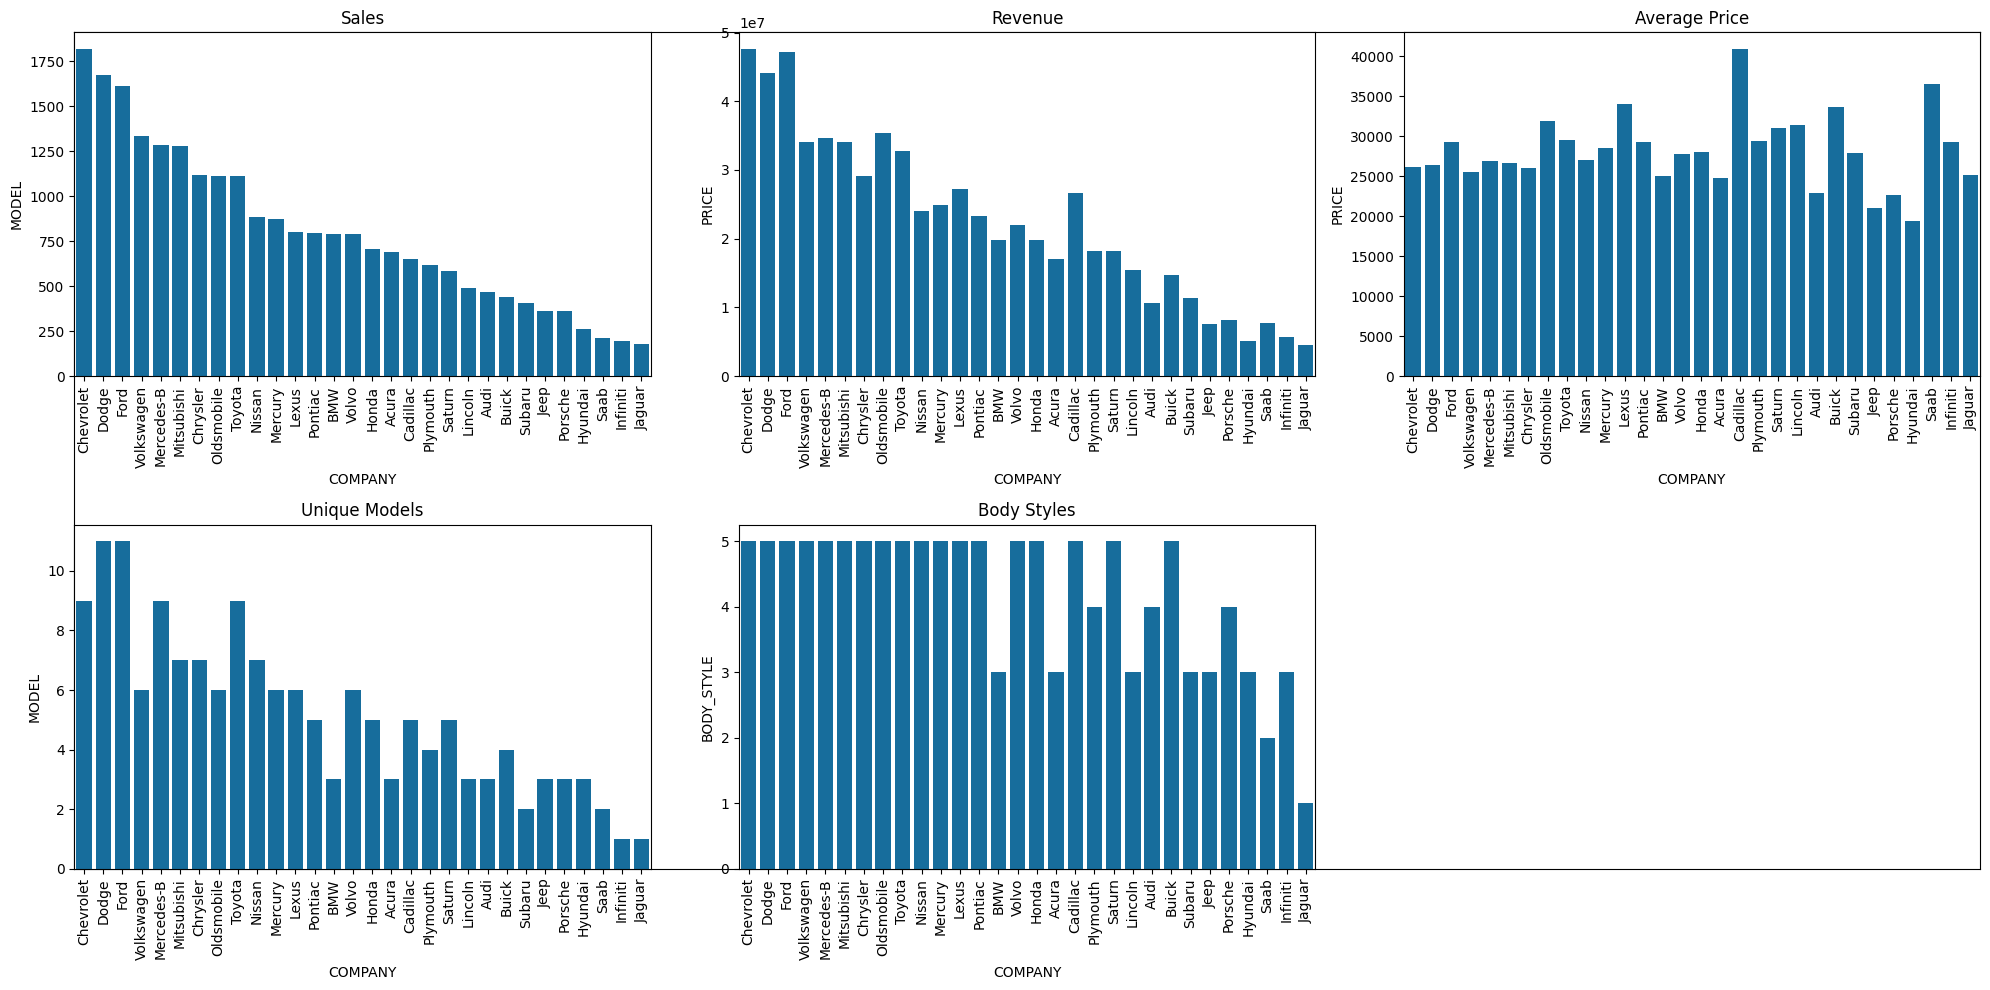

In [37]:
# Sorting car sales data by company and model count
sales_order = list(car_sales_data.groupby('COMPANY')["MODEL"].count().sort_values(ascending=False).index)
body_style_order = car_sales_data.groupby("BODY_STYLE")["MODEL"].count().sort_values(ascending=False).index

# Defining a specific order for visualization
sales_order = ['Chevrolet', 'Dodge', 'Ford', 'Volkswagen', 'Mercedes-B', 'Mitsubishi',
               'Chrysler', 'Oldsmobile', 'Toyota', 'Nissan', 'Mercury', 'Lexus',
               'Pontiac', 'BMW', 'Volvo', 'Honda', 'Acura', 'Cadillac', 'Plymouth',
               'Saturn', 'Lincoln', 'Audi', 'Buick', 'Subaru', 'Jeep', 'Porsche',
               'Hyundai', 'Saab', 'Infiniti', 'Jaguar']

# Sorting body styles by model count
body_style_order = car_sales_data.groupby("BODY_STYLE")["MODEL"].count().sort_values(ascending=False).index

# Creating subplots for various sales metrics
fig, ax = plt.subplots(figsize=(20,10))

plt.subplot(2,3,1)
sns.barplot(car_sales_data.groupby('COMPANY')["MODEL"].count(), order=sales_order)
plt.title('Sales')
plt.xticks(rotation=90)

plt.subplot(2,3,2)
sns.barplot(car_sales_data.groupby('COMPANY')["PRICE"].sum(), order=sales_order)
plt.title('Revenue')
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.barplot(car_sales_data.groupby('COMPANY')["MODEL"].nunique(), order=sales_order)
plt.title('Unique Models')
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.barplot(car_sales_data.groupby('COMPANY')["PRICE"].mean(), order=sales_order)
plt.title('Average Price')
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.barplot(car_sales_data.groupby('COMPANY')["BODY_STYLE"].nunique(), order=sales_order)
plt.title('Body Styles')
plt.xticks(rotation=90)

# Hide axis labels for a cleaner look
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()


**Insights:**
* Although some brands have a lower number of sales, they still achieved higher revenue than brands with more cars sold. This can be attributed to the price of the cars. The most evident example is Cadillac, which had higher revenue than eight brands that sold more vehicles. Additionally, Cadillac has the highest average car price.
* The model distribution graph follows a similar pattern to the sales graph, which may indicate that a brand's variety of models impacts its sales. Brands with more models tend to sell more cars.
* Car price is not a determining factor in this sample, as brands have a similar average price.


#### Highest Performance Companies


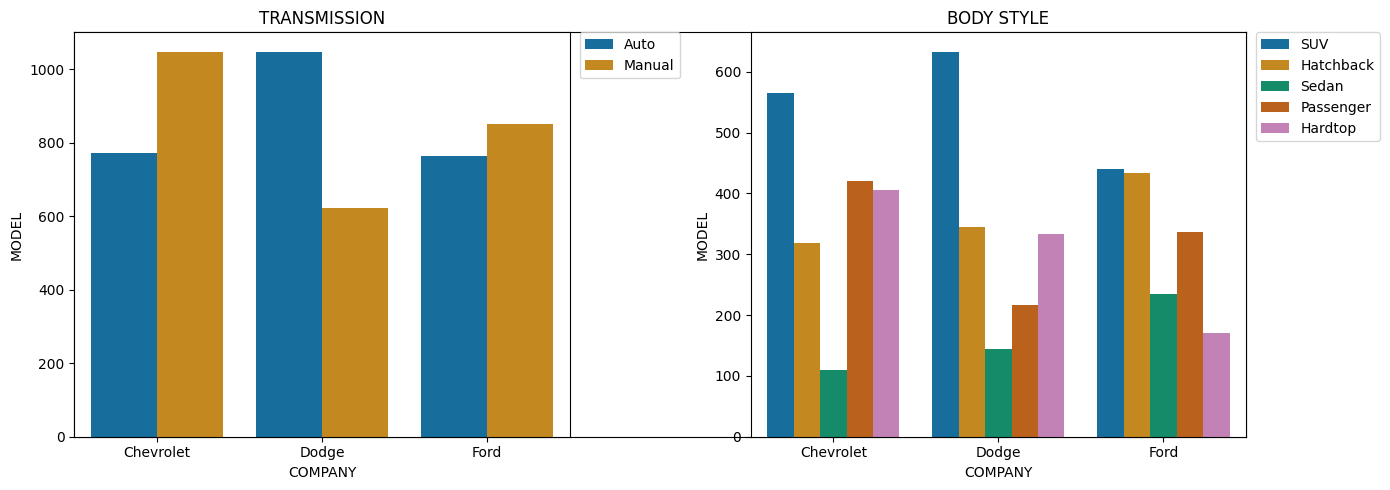

In [38]:
top3 = car_sales_data.query(f'COMPANY in {sales_order[0:3]}')

fig, ax = plt.subplots(figsize = (14,5))

plt.subplot(1,2,1)
sns.barplot(data = top3.groupby(["COMPANY","TRANSMISSION"])["MODEL"].count().to_frame() , y = 'MODEL', x = "COMPANY",hue = "TRANSMISSION", order = sales_order[0:3], palette = palette)
plt.title('TRANSMISSION')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.subplot(1,2,2)
sns.barplot(data = top3.groupby(["COMPANY","BODY_STYLE"])["MODEL"].count().to_frame() , y = 'MODEL', x = "COMPANY",hue = 'BODY_STYLE', order = sales_order[0:3], hue_order = body_style_order ,  palette = palette)
plt.title('BODY STYLE')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()

plt.show()

**Insights:**
* As shown in the graphs, the three companies have different distributions regarding transmission and body style. However, it is noticeable that the highest number of sales for all three brands comes from the same body style, "SUV," which makes sense since it is the best-selling style.


#### Lowest Performance Companies


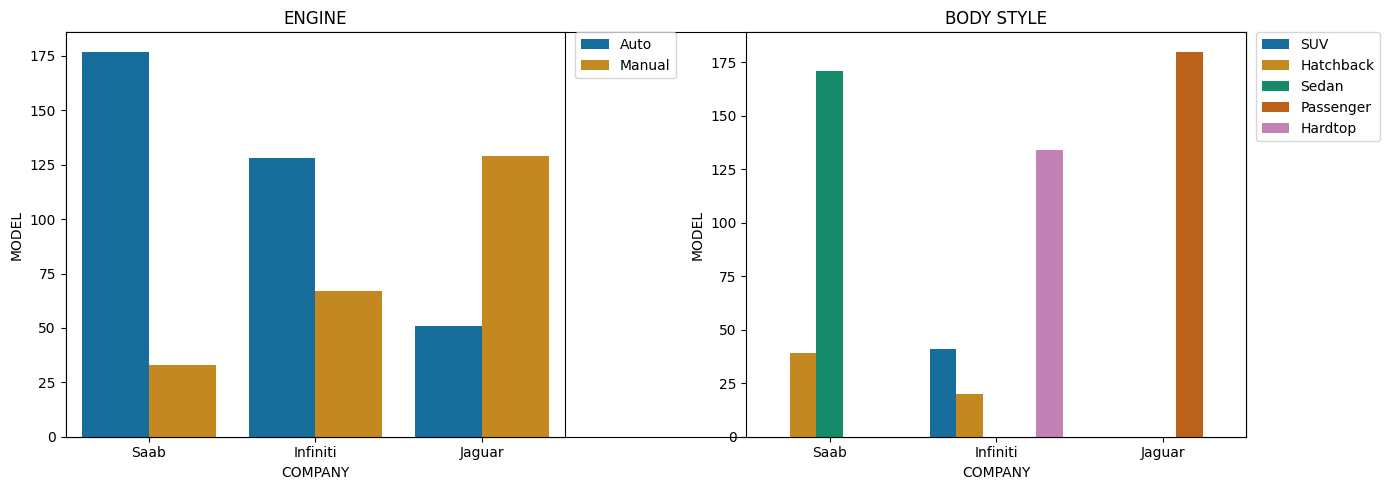

In [39]:
bottom3 = car_sales_data.query(f'COMPANY in {sales_order[27:30]}')

fig, ax = plt.subplots(figsize = (14,5))

plt.subplot(1,2,1)
sns.barplot(data = bottom3.groupby(["COMPANY","TRANSMISSION"])["MODEL"].count().to_frame() , y = 'MODEL', x = "COMPANY",hue = "TRANSMISSION", order = sales_order[27:30])
plt.title('ENGINE')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.subplot(1,2,2)
sns.barplot(data = bottom3.groupby(["COMPANY","BODY_STYLE"])["MODEL"].count().to_frame() , y = 'MODEL', x = "COMPANY",hue = 'BODY_STYLE', order = sales_order[27:30], hue_order = body_style_order)
plt.title('BODY STYLE')
ax.set(ylim=(0, bottom3.groupby(["COMPANY","BODY_STYLE"])["MODEL"].count().to_frame().reset_index()['MODEL'].max()))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()

plt.show()

**Insights:**
* In the worst cases, differences between the companies can be seen in both graphs. However, when analyzing the car body style, the companies do not have sales across all styles, which may impact sales to the general public. In fact, the best-selling style for each company belongs to the group with the least sold styles, raising the possibility that these companies target a more specific audience.


### Body Style

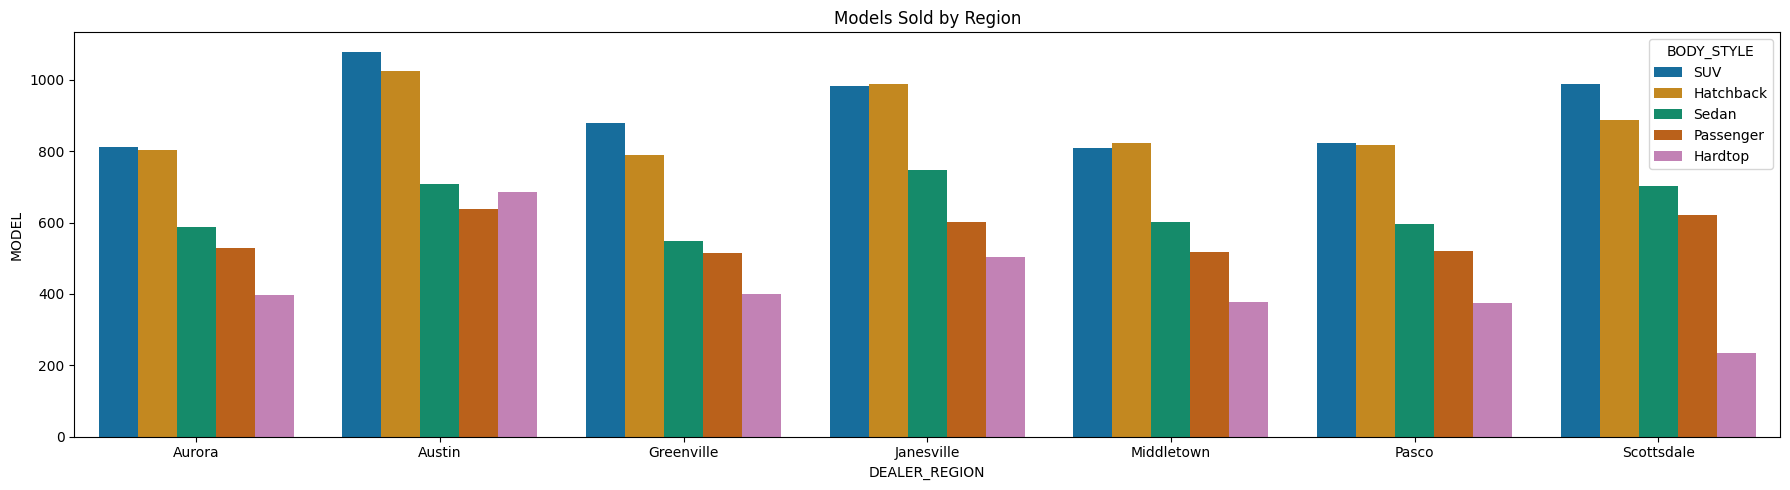

In [40]:
# Creating a bar plot to visualize the number of models sold per region by body style

fig, ax = plt.subplots(figsize=(18, 5))

sns.barplot(
    data=car_sales_data.groupby(['BODY_STYLE', 'DEALER_REGION'])["MODEL"].count().to_frame(),
    x='DEALER_REGION',
    y="MODEL",
    hue="BODY_STYLE",
    hue_order=body_style_order
)

plt.title('Models Sold by Region')

plt.tight_layout()
plt.show()


**Insights:**
* In general, the distribution of car sales by body style is similar across all regions. However, it is interesting to analyze the sales of hardtops in Austin.
* The Austin region is the only one where hardtop cars are not the least sold, whereas in other regions, their sales numbers are significantly lower compared to passenger-type cars.


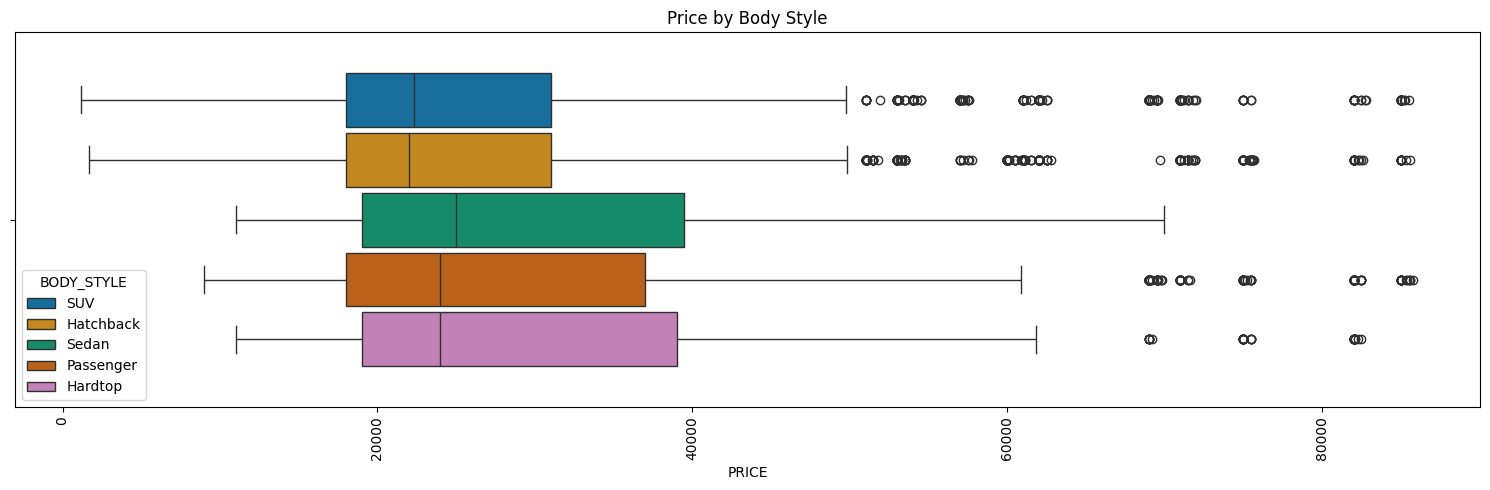

In [41]:
fig, ax = plt.subplots(figsize = (15,5))

sns.boxplot(car_sales_data[["PRICE", "BODY_STYLE"]],x = "PRICE", hue = "BODY_STYLE", hue_order = body_style_order , gap = 0.1)
plt.title('Price by Body Style')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Insights:**
* The price distribution of the two most sold car body styles is similar and concentrated in lower price ranges, which may have a direct correlation with their popularity.  
* Meanwhile, other body styles show a higher proportion of sales for more expensive cars.

### Preferences by gender

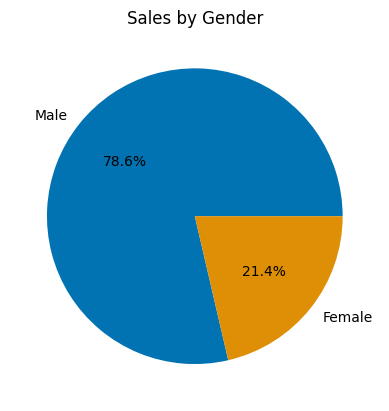

In [42]:
plt.pie(car_sales_data['GENDER'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Sales by Gender')
plt.show()


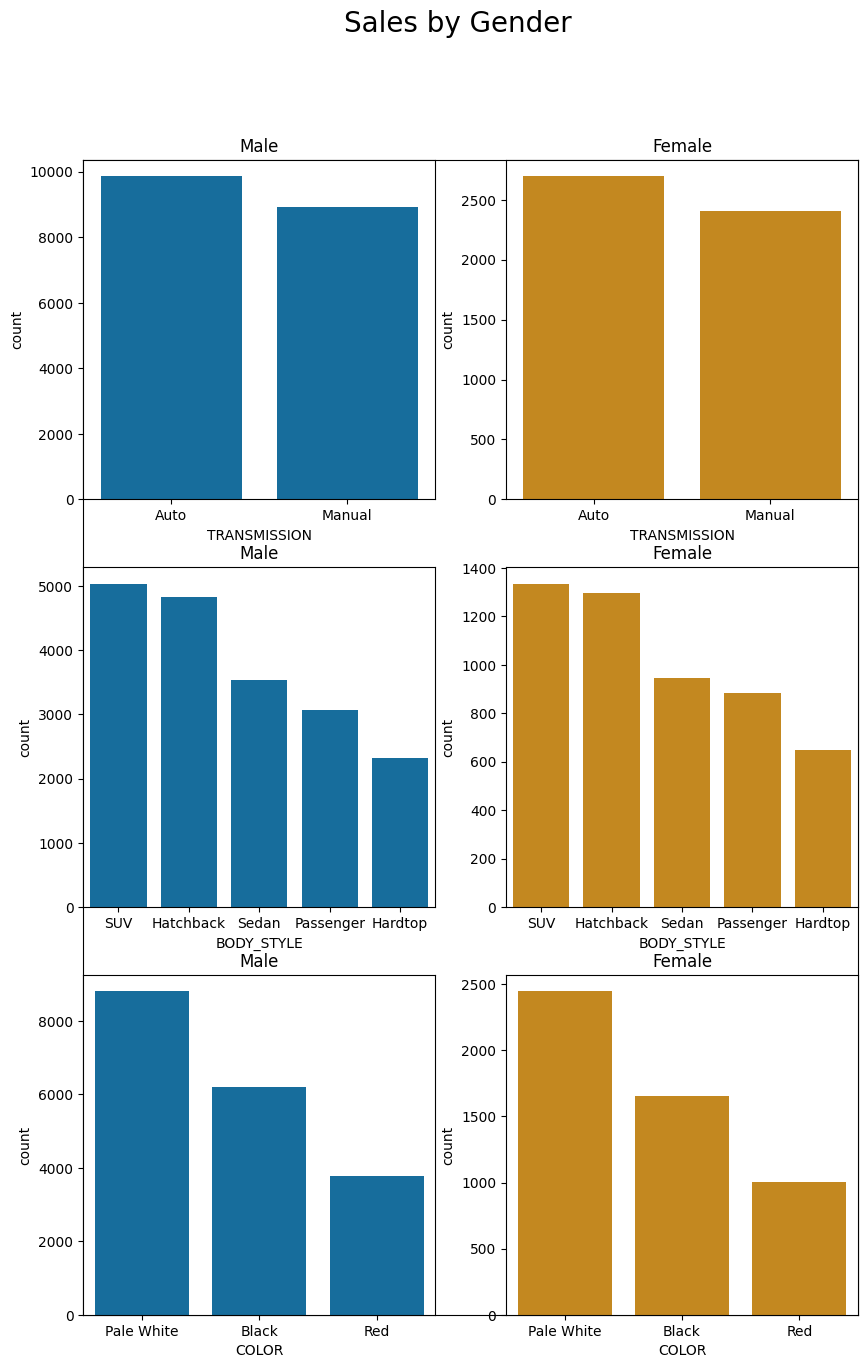

In [43]:
fig, ax = plt.subplots(figsize=(10,15))

plt.subplot(3,2,1)
sns.barplot(car_sales_data.query('GENDER == "Male"')['TRANSMISSION'].value_counts())
plt.title('Male')

plt.subplot(3,2,2)
sns.barplot(car_sales_data.query('GENDER == "Female"')['TRANSMISSION'].value_counts(), color=palette[1])
plt.title('Female')

plt.subplot(3,2,3)
sns.barplot(car_sales_data.query('GENDER == "Male"')['BODY_STYLE'].value_counts())
plt.title('Male')

plt.subplot(3,2,4)
sns.barplot(car_sales_data.query('GENDER == "Female"')['BODY_STYLE'].value_counts(), color=palette[1])
plt.title('Female')

plt.subplot(3,2,5)
sns.barplot(car_sales_data.query('GENDER == "Male"')['COLOR'].value_counts())
plt.title('Male')

plt.subplot(3,2,6)
sns.barplot(car_sales_data.query('GENDER == "Female"')['COLOR'].value_counts(), color=palette[1])
plt.title('Female')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.suptitle('Sales by Gender', fontsize=20)

plt.show()


**Insights:**  
* Although men are by far the largest consumer group for cars, the data does not indicate a significant difference in car preferences by gender, contradicting possible sexist stereotypes.


# 2024 Sales Forecasting Model


Finally, a sales forecast model for the next year was requested. However, only two years of sales data were provided, and as observed, sales seasonality is annual. This means that it is not possible to build an ML model using a train-test split for evaluation. If such a split were made, the training data would consist only of 2022, leading to an inaccurate forecast without accounting for sales seasonality.  

It is worth noting that a forecast can still be made using a model trained on both years of data, but without an evaluation step. While this approach does not guarantee accuracy for 2024 data, it can still be highly useful for sales planning and other strategic decisions.


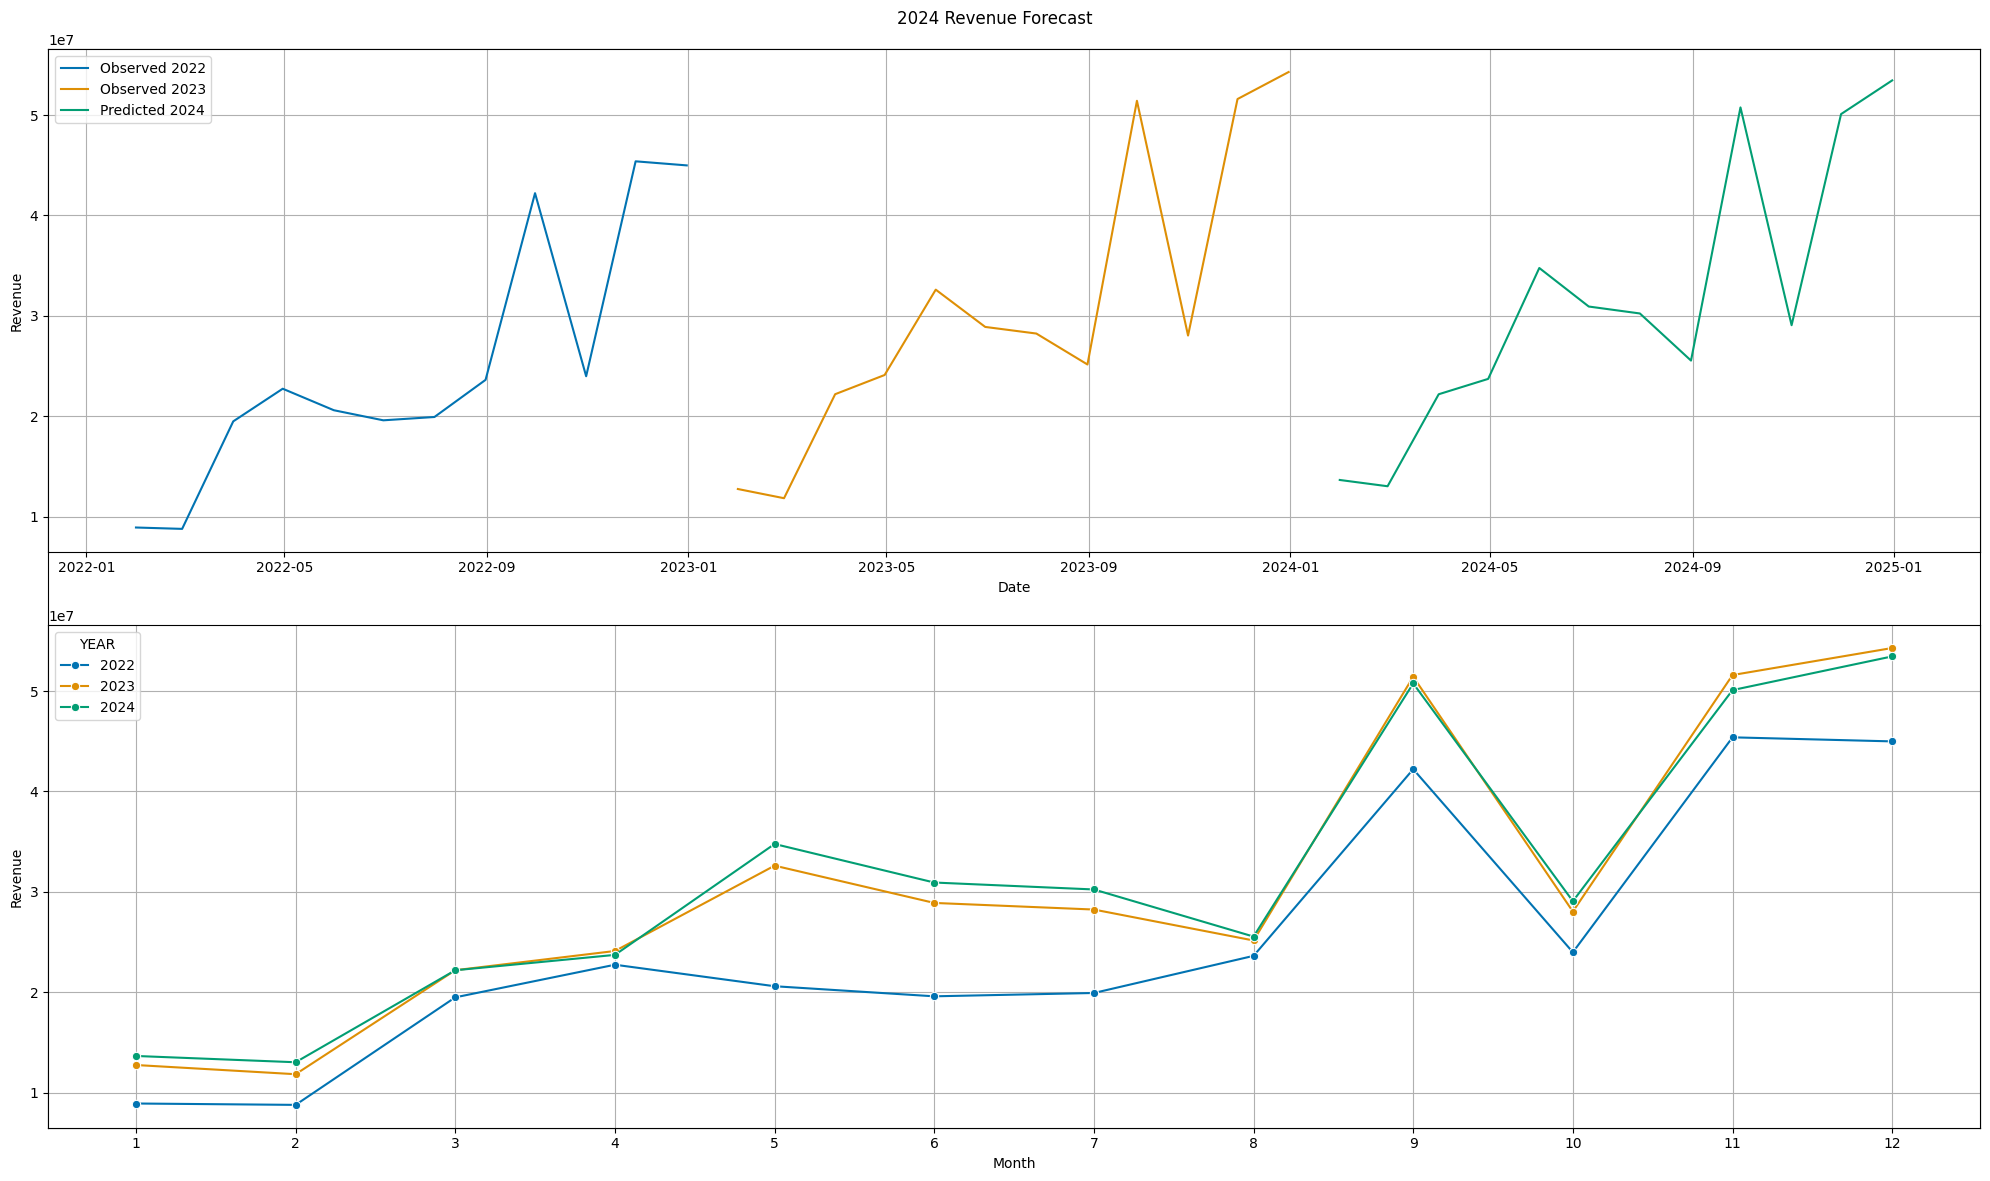

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Selecting relevant columns
df = car_sales_data[['PRICE', 'MONTH', 'YEAR']]
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Grouping data by month to calculate monthly revenue
monthly_sales = df.groupby(pd.Grouper(key='DATE', freq='M'))['PRICE'].sum().reset_index()

# Setting date as index
monthly_sales.set_index('DATE', inplace=True)

# Creating a DataFrame for 2024 predictions
forecast_steps = 12
train = monthly_sales

# Fitting the SARIMA model with annual seasonality
sarima_model = sm.tsa.statespace.SARIMAX(
    train['PRICE'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
sarima_result = sarima_model.fit(disp=False)

# Forecasting for 12 months (2024)
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_values = sarima_forecast.predicted_mean

# Creating a DataFrame for 2024 predictions
pred_2024 = pd.DataFrame({
    'MONTH': range(1, 13),
    'YEAR': 2024,
    'PRICE': forecast_values.values
})

# Preparing the dataset for the second graph
monthly_sales_reset = monthly_sales.reset_index()
monthly_sales_reset['MONTH'] = monthly_sales_reset['DATE'].dt.month
monthly_sales_reset['YEAR'] = monthly_sales_reset['DATE'].dt.year

combined_sales = pd.concat([monthly_sales_reset, pred_2024])  # Combine all years, including predictions

# Visualizing the forecast
fig, ax = plt.subplots(figsize=(20, 12))

# Plotting observed and predicted values in separate subplots
plt.subplot(2, 1, 1)
plt.plot(monthly_sales.index[0:12], monthly_sales['PRICE'][0:12], label='Observed 2022', color=palette[0])
plt.plot(monthly_sales.index[12:24], monthly_sales['PRICE'][12:24], label='Observed 2023', color=palette[1])
plt.plot(pd.date_range(start='2024-01-01', periods=forecast_steps, freq='M'), forecast_values, label='Predicted 2024', color=palette[2])
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Plotting all years (2022, 2023, 2024) in a single graph with distinct colors
plt.subplot(2, 1, 2)
sns.lineplot(data=combined_sales, x='MONTH', y='PRICE', marker='o', hue='YEAR', errorbar=None, palette=palette)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1, 13))
plt.grid(True)

plt.suptitle('2024 Revenue Forecast')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()


With this, it was possible to create a sales forecast for the year 2024. It is important to highlight that, due to the small sample of data provided, the purpose of this model is not to provide an exact prediction of 2024 sales. However, it can serve other purposes, such as establishing sales targets.